# Classification methods



In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report




In [ ]:
breastData = load_breast_cancer()
data = breastData.data
target = breastData.target
print(breastData['feature_names'])



['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df = pd.DataFrame(data=breastData.data, columns=breastData.feature_names)
df['target'] = breastData.target
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(data,target,test_size=0.2,random_state=42)



```
# This is formatted as code
```

# Support Vector Machine classification


In [ ]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions =  model.predict(X_test)
svc_accuracy = accuracy_score(y_test,predictions)
svc_precision = precision_score(y_test, predictions)
svc_recall = recall_score(y_test, predictions)
svc_f1 = f1_score(y_test, predictions)


print("Naive_accuracy: " ,svc_accuracy)
print("naive_accuracy: ", svc_accuracy)
print("naive_Precision:", svc_precision)
print("naive_Recall:", svc_recall)
print("naive_F1 Score:", svc_f1)

Naive_accuracy:  0.9473684210526315
naive_accuracy:  0.9473684210526315
naive_Precision: 0.922077922077922
naive_Recall: 1.0
naive_F1 Score: 0.9594594594594594


# Logistic regression classification

In [ ]:
logReg = LogisticRegression(penalty='l2',solver="sag",C=1.0,random_state=33)
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
logistic_accuracy = accuracy_score(y_test,y_pred)
logistic_precision = precision_score(y_test, y_pred)
logistic_recall = recall_score(y_test, y_pred)
logistic_f1 = f1_score(y_test, y_pred)

print("logistic_accuracy: ", logistic_accuracy)
print("logistic_Precision:", logistic_precision)
print("logistic_Recall:", logistic_recall)
print("logistic_F1 Score:", logistic_f1)

logistic_accuracy:  0.9473684210526315
logistic_Precision: 0.9333333333333333
logistic_Recall: 0.9859154929577465
logistic_F1 Score: 0.9589041095890412


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Naive Bayes

In [ ]:
naive =  GaussianNB()
naive_pred = naive.fit(X_train, y_train).predict(X_test)
logistic_accuracy = accuracy_score(y_test,naive_pred)
logistic_precision = precision_score(y_test, naive_pred)
logistic_recall = recall_score(y_test, naive_pred)
logistic_f1 = f1_score(y_test, naive_pred)

print("logistic_accuracy: ", logistic_accuracy)
print("logistic_Precision:", logistic_precision)
print("logistic_Recall:", logistic_recall)
print("logistic_F1 Score:", logistic_f1)


logistic_accuracy:  0.9736842105263158
logistic_Precision: 0.9594594594594594
logistic_Recall: 1.0
logistic_F1 Score: 0.9793103448275862


#Nueral Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(data.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
#strandardizetion the data
scaler  = StandardScaler()
std_x_train = scaler.fit_transform(X_train)

std_x_test = scaler.fit_transform(X_test)


In [ ]:
#layers setting
model = tf.keras.models.Sequential([
    #convert the data in one single dimentional
    tf.keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation='sigmoid'),
    ])

In [ ]:
#compiling
model.compile(optimizer = 'adam',
            loss ="sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [ ]:
#training the nueral network
history = model.fit(X_train,y_train,validation_split = 0.1,epochs = 10)

Epoch 1/10
13/13 [==============================] - 2s 38ms/step - loss: 317.4231 - accuracy: 0.6210 - val_loss: 216.5980 - val_accuracy: 0.6957
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 250.2840 - accuracy: 0.6210 - val_loss: 164.3468 - val_accuracy: 0.6957
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 184.8371 - accuracy: 0.6210 - val_loss: 116.5202 - val_accuracy: 0.6957
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 123.9711 - accuracy: 0.6210 - val_loss: 71.6805 - val_accuracy: 0.6957
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 69.5957 - accuracy: 0.5892 - val_loss: 29.7275 - val_accuracy: 0.5435
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 29.2531 - accuracy: 0.1980 - val_loss: 22.0056 - val_accuracy: 0.2391
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 21.9691 - accuracy: 0.2910 - val_loss: 19.7931 - val_accuracy: 0.239

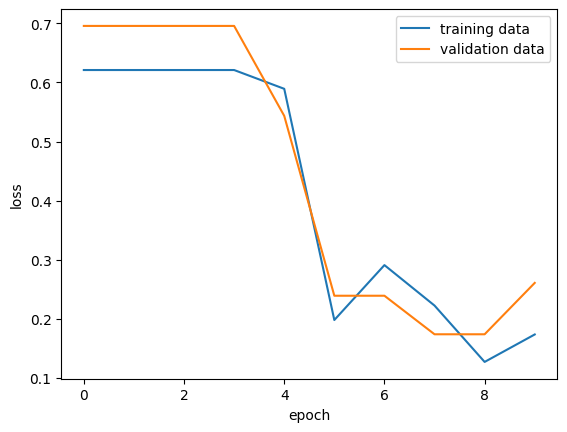

In [ ]:
#visualization the accuracy and the loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['training data', 'validation data'], loc='upper right')

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)
print(accuracy)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(nn_pred, axis=1)

# Convert true labels to class labels if necessary
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

4/4 [==============================] - 0s 6ms/step - loss: 150.9045 - accuracy: 0.3772
0.37719297409057617


TypeError: Singleton array 0 cannot be considered a valid collection.

In [ ]:
print(X_test.shape)
print(X_test[0])

(114, 30)
[1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
 3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
 6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
 2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
 3.014e-01 8.750e-02]


Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 0.0522 - accuracy: 0.9853 - val_loss: 0.0886 - val_accuracy: 0.9565
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0511 - accuracy: 0.9853 - val_loss: 0.0878 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0878 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0869 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.0865 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0480 - accuracy: 0.9902 - val_loss: 0.0862 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 0.9902 - val_loss: 0.0862 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

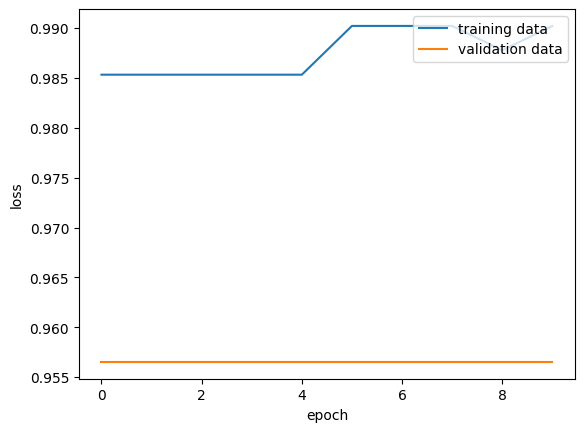

In [ ]:
#training the nueral network
historyS = model.fit(std_x_train,y_train,validation_split = 0.1,epochs = 10)
loss1, accuracy1 = model.evaluate(std_x_test,y_test)

plt.plot(historyS.history['accuracy'])
plt.plot(historyS.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['training data', 'validation data'], loc='upper right')

In [ ]:
nn_pred = model.predict(X_test)
print(nn_pred.shape)
print(nn_pred[0]) #left : probability is 0 , right: probability is 1

4/4 [==============================] - 0s 4ms/step
(114, 2)
[1.0000000e+00 1.0635314e-17]


In [ ]:
print(nn_pred)

[[1.00000000e+00 1.06353143e-17]
 [1.00000000e+00 1.59103694e-15]
 [1.00000000e+00 5.07318843e-16]
 [1.00000000e+00 4.53044205e-13]
 [1.00000000e+00 1.16811657e-13]
 [1.00000000e+00 2.00338750e-15]
 [1.00000000e+00 3.26936506e-10]
 [1.00000000e+00 2.23755052e-07]
 [1.00000000e+00 7.48124165e-13]
 [1.00000000e+00 2.63896727e-09]
 [1.00000000e+00 5.98711957e-14]
 [1.00000000e+00 2.91787915e-13]
 [1.00000000e+00 9.76790147e-07]
 [1.00000000e+00 1.65376235e-09]
 [1.00000000e+00 1.02200789e-10]
 [1.00000000e+00 2.03622607e-04]
 [1.00000000e+00 3.66071326e-05]
 [1.00000000e+00 1.86166534e-15]
 [1.00000000e+00 1.15436496e-16]
 [1.00000000e+00 2.21417006e-03]
 [1.00000000e+00 2.58055923e-14]
 [1.00000000e+00 4.53671270e-16]
 [1.00000000e+00 3.25750597e-02]
 [1.00000000e+00 4.82219728e-17]
 [1.00000000e+00 1.96406784e-16]
 [1.00000000e+00 6.41626619e-09]
 [1.00000000e+00 9.19999243e-10]
 [1.00000000e+00 1.88993358e-18]
 [1.00000000e+00 1.01954968e-12]
 [1.00000000e+00 2.55583213e-14]
 [1.000000

In [ ]:
#convert the probabilities to 1 amd 0
nn_pred_labels = [np.argmax(i) for i in nn_pred] #np.argmax return the index of max value in i
#if the first is max , will return zero , if the second max will return 1
print(nn_pred_labels)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **Building the predictive system**

# confusion matrix

In [ ]:
#SVC confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()


In [ ]:
#logastic confusion matrix
cm2 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=logReg.classes_)
disp.plot()

In [ ]:
#naive byes confusion matrix


cm3 = confusion_matrix(y_test, naive_pred)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=naive.classes_)
disp1.plot()


